In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

/var/folders/1q/ttq7y9792hl1j72br9_w4vzw0000gn/T/ipykernel_26209/463198658.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Data Preparation

In [2]:
df = pd.read_csv("../dataset/HousingData.csv")

In [3]:
scaler = MinMaxScaler()
df_normalized= pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Menampilkan statistik ringkasan data setelah normalisasi
print("\nStatistik ringkasan setelah normalisasi:\n")
display(df_normalized.describe())


Statistik ringkasan setelah normalisasi:



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,0.040526,0.112119,0.389443,0.069959,0.349167,0.521869,0.675783,0.242381,0.371713,0.422208,0.622929,0.898568,0.303130,0.389618
std,0.098013,0.233889,0.250583,0.255340,0.238431,0.134627,0.288357,0.191482,0.378576,0.321636,0.230313,0.230205,0.197458,0.204380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000850,0.000000,0.173387,0.000000,0.131687,0.445392,0.435376,0.088259,0.130435,0.175573,0.510638,0.945730,0.148869,0.267222
50%,0.002781,0.000000,0.338343,0.000000,0.314815,0.507281,0.761071,0.188949,0.173913,0.272901,0.686170,0.986232,0.267660,0.360000
75%,0.039945,0.125000,0.646628,0.000000,0.491770,0.586798,0.937951,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116,0.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Cleaning

In [4]:
display(df_normalized[["LSTAT","MEDV","RM","DIS"]].isnull().sum())

LSTAT    20
MEDV      0
RM        0
DIS       0
dtype: int64

In [5]:
df_normalized['LSTAT'] = df_normalized['LSTAT'].fillna(df_normalized['LSTAT'].mean())

In [6]:
display(df_normalized[["LSTAT","MEDV","RM","DIS"]].isnull().sum())

LSTAT    0
MEDV     0
RM       0
DIS      0
dtype: int64

In [7]:
X1 = df_normalized["LSTAT"]
X2 = df_normalized["DIS"]
X3 = df_normalized["RM"]
Y = df_normalized["MEDV"]

# Melatih Model

In [8]:
data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'Y': Y})

# Add polynomial features
data['X1_sq'] = data['X1'] ** 2
data['X2_sq'] = data['X2'] ** 2
data['X3_sq'] = data['X3'] ** 2
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


In [9]:
X_train = sm.add_constant(train_data[['X1', 'X2', 'X3']])
Y_train = train_data['Y']

# Extracting features and target variable for testing
X_test = sm.add_constant(test_data[['X1', 'X2', 'X3']])
Y_test = test_data['Y']

In [10]:
display(data)

,X1,X2,X3,Y,X1_sq,X2_sq,X3_sq
0,0.089680,0.269203,0.577505,0.422222,0.008042,0.072470,0.333512
1,0.204470,0.348962,0.547998,0.368889,0.041808,0.121774,0.300301
2,0.063466,0.348962,0.694386,0.660000,0.004028,0.121774,0.482172
3,0.033389,0.448545,0.658555,0.631111,0.001115,0.201192,0.433695
4,0.303130,0.448545,0.687105,0.693333,0.091888,0.201192,0.472113
...,...,...,...,...,...,...,...
501,0.303130,0.122671,0.580954,0.386667,0.091888,0.015048,0.337508
502,0.202815,0.105293,0.490324,0.346667,0.041134,0.011087,0.240417
503,0.107892,0.094381,0.654340,0.420000,0.011641,0.008908,0.428161
504,0.131071,0.114514,0.619467,0.377778,0.017180,0.013113,0.383740


In [11]:
model = sm.OLS(Y_train, X_train).fit()

/var/folders/1q/ttq7y9792hl1j72br9_w4vzw0000gn/T/ipykernel_26209/3749751757.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  X3_surf = model.params[0] + model.params[1]*X1_surf + model.params[2]*X2_surf  # linear regression


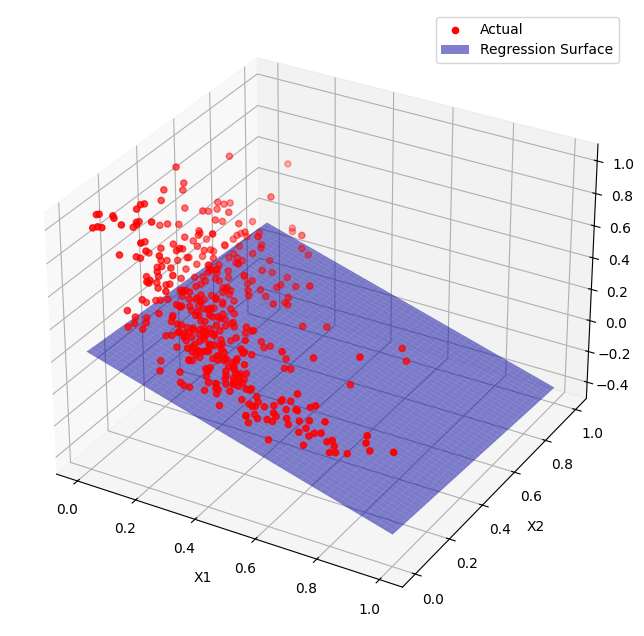

In [20]:
# Visualize the model
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the actual data from training set
ax.scatter(train_data['X1'], train_data['X2'], train_data['Y'], color='red', label='Actual')

# Create meshgrid for surface plot
X1_surf, X2_surf = np.meshgrid(np.linspace(train_data['X1'].min(), train_data['X1'].max(), 100), 
                                np.linspace(train_data['X2'].min(), train_data['X2'].max(), 100))
X3_surf = model.params[0] + model.params[1]*X1_surf + model.params[2]*X2_surf  # linear regression

# Plot the surface
ax.plot_surface(X1_surf, X2_surf, X3_surf, color='blue', alpha=0.5, label='Regression Surface')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.legend()

plt.show()


# Analisis Model

In [14]:
from my_package.diagnosticPlot import diagnostic_plots

In [21]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     240.8
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           3.09e-89
Time:                        16:22:09   Log-Likelihood:                 271.24
No. Observations:                 404   AIC:                            -534.5
Df Residuals:                     400   BIC:                            -518.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2370      0.043      5.492      0.0

/Users/max/Desktop/learningML/.env/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


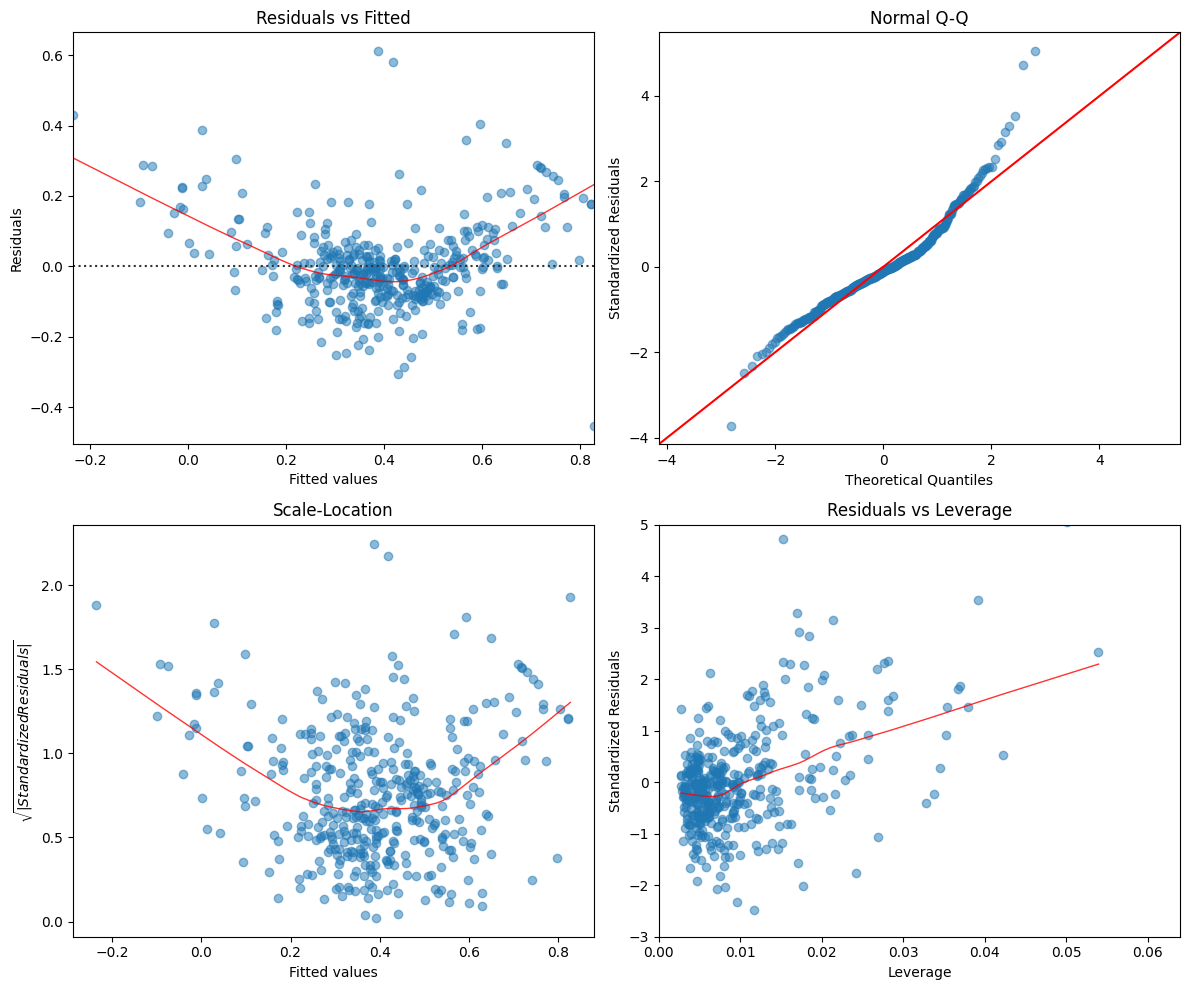

In [16]:
diagnostic_plots(X_train, Y_train, model_fit=model)

In [17]:
Y_pred_test = model.predict(X_test)

In [18]:
residuals_test = Y_test - Y_pred_test

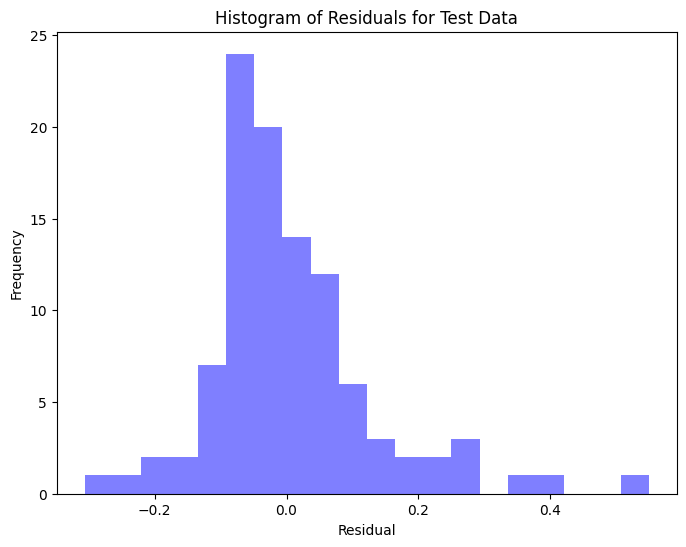

In [19]:
plt.figure(figsize=(8, 6))
plt.hist(residuals_test, bins=20, color='blue', alpha=0.5)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals for Test Data')
plt.show()
